In [1]:
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
raw_data=pd.read_csv('1000 companies list and rating.csv')
raw_data.head(3)

,Unnamed: 0,company,type,rating,reviewers,age,highly_ratedFOR,critically_ratedFOR
0,0,TCS,IT Services & Consulting,3.8,73.8k Reviews,56 years old,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits"
1,1,Accenture,IT Services & Consulting,4.0,46.8k Reviews,35 years old,"Company Culture, Skill Development / Learning,...",NaN
2,2,Cognizant,IT Services & Consulting,3.9,42.2k Reviews,30 years old,Skill Development / Learning,Promotions / Appraisal


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10000 non-null  int64  
 1   company              10000 non-null  object 
 2   type                 9591 non-null   object 
 3   rating               10000 non-null  float64
 4   reviewers            10000 non-null  object 
 5   age                  9211 non-null   object 
 6   highly_ratedFOR      9916 non-null   object 
 7   critically_ratedFOR  2824 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [5]:
raw_data.nunique()

Unnamed: 0             10000
company                 9112
type                      86
rating                    32
reviewers                886
age                      219
highly_ratedFOR          254
critically_ratedFOR      124
dtype: int64

### convert age and reviewers columns to float data in order to analyse

In [6]:
#rename a column name
df=raw_data.rename(columns={'Unnamed: 0':'index'})

In [7]:
#convert age column's type to float
df['age']=df['age'].str.replace(' years old', '').astype('float')

In [8]:
#convert reviewers column's type to float - step 1
df['reviewers']=df['reviewers'].str.replace(' Reviews','')

In [9]:
#convert reviewers column's type to float - step 2
def value_to_float(x):
    if 'k' in x:
        if len(x)>1:
            return float(x.replace('k', ''))*1000
        return 1000.0
    else:
        return float(x)
df['reviewers'] = df['reviewers'].apply(value_to_float)

In [10]:
#set the column 'index' as index of dataset
df.set_index('index', inplace=True)

In [11]:
#checking the results
df.head(3)

,company,type,rating,reviewers,age,highly_ratedFOR,critically_ratedFOR
index,,,,,,,
0,TCS,IT Services & Consulting,3.8,73800.0,56.0,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits"
1,Accenture,IT Services & Consulting,4.0,46800.0,35.0,"Company Culture, Skill Development / Learning,...",NaN
2,Cognizant,IT Services & Consulting,3.9,42200.0,30.0,Skill Development / Learning,Promotions / Appraisal


### Now we are ready to analyse data

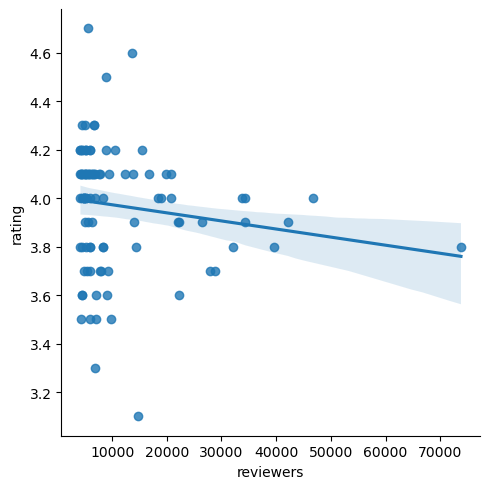

In [12]:
# choose the top 100 companies by reviewers and analyse the correlation between 'reviewers' and 'rating'
top_100=df.head(100)
sns.lmplot(
    data=top_100,
    x='reviewers',
    y='rating'
)

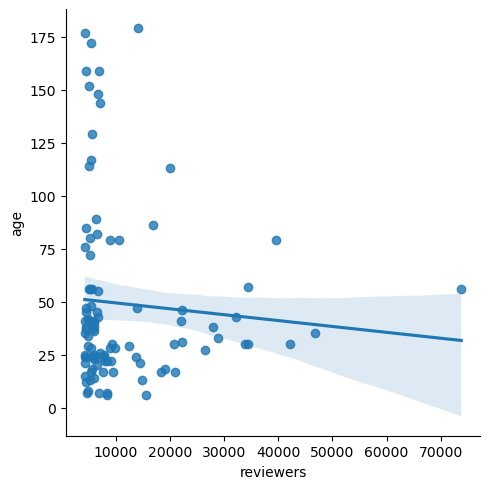

In [24]:
# analyse the correlation between 'reviewers' and 'age'
sns.lmplot(
    data=top_100,
    x='reviewers',
    y='age',
)

<Axes: xlabel='index', ylabel='reviewers'>

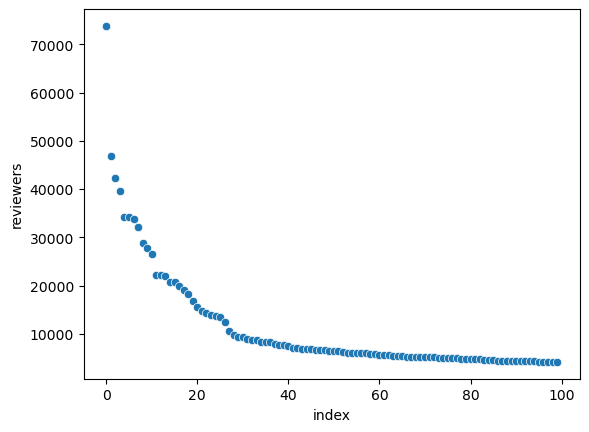

In [15]:
sns.scatterplot(
    data=top_100,
    x=top_100.index,
    y='reviewers'
)

<Axes: xlabel='index', ylabel='rating'>

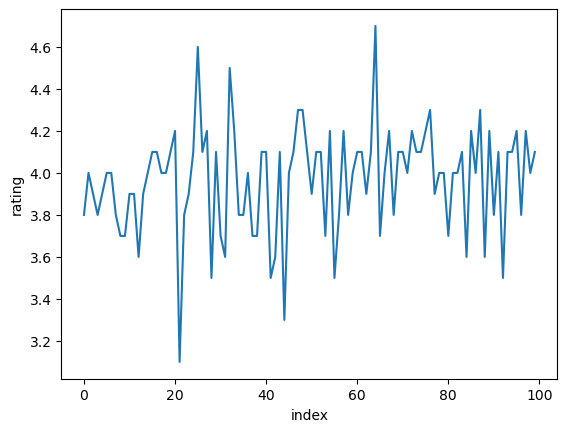

In [16]:
sns.lineplot(
    data=top_100,
    x=top_100.index,
    y='rating',
)

In [17]:
df['type'].unique()

array(['IT Services & Consulting ', 'Banking ', 'BPO ', 'Telecom ',
       'Internet ', 'Retail ', 'NBFC ', 'Engineering & Construction ',
       'EdTech ', 'Management Consulting ', 'Oil & Gas ', 'Automobile ',
       'Insurance ', 'Financial Services ',
       'Consumer Electronics & Appliances ', 'Chemicals ', 'Pharma ',
       'FinTech ', 'Building Material ', 'Analytics & KPO ',
       'Defence & Aerospace ', 'Iron & Steel ', 'Logistics ', 'FMCG ',
       nan, 'Software Product ', 'Healthcare ', 'Industrial Automation ',
       'Real Estate ', 'Clinical Research ', 'Auto Components ',
       'Investment Banking / Venture Capital / Private Equity ',
       'Hospitality ', 'Fashion & Textile ', 'Beverage ',
       'Industrial Machinery ', 'Recruitment ', 'Electrical Equipment ',
       'Facility Management Services ', 'Electronics Manufacturing ',
       'Metals & Mining ', 'Non-Profit ', 'Agro Chemicals ', 'Aviation ',
       'Food Processing ', 'Accounting & Auditing ', 'Power ',


<Axes: xlabel='age', ylabel='reviewers'>

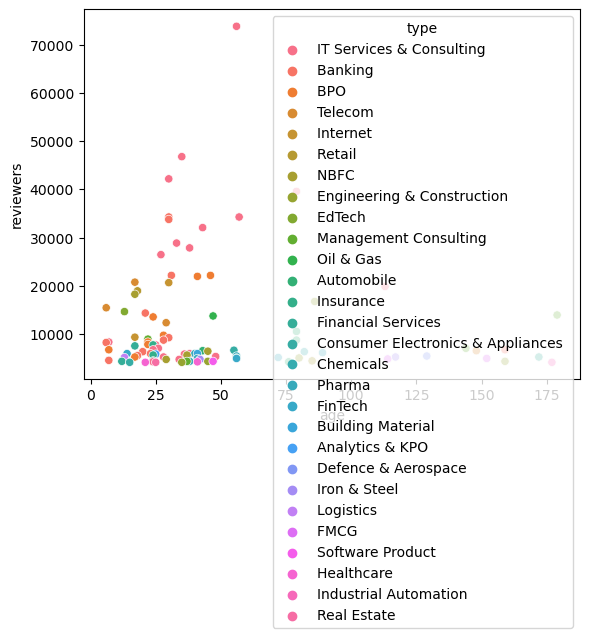

In [22]:
sns.scatterplot(
    data=top_100,
    x='age',
    y='reviewers',
    hue='type',
)